In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from os import listdir
from os.path import isfile, join, basename, splitext
import datetime

In [ ]:
now = datetime.datetime.now()
timestamp = now.strftime("%Y%m%d_%H%M%S")

#this code creates a list with all the files that exist in a folder
traces_path = r"Z:/smorou/Analysis/imaging_analysis/CalciumIm/Traces/"
coords_path = r"Z:/smorou/Analysis/imaging_analysis/CalciumIm/Coordinates"
tiff_path = r"Z:/smorou/Calcium Imaging/FV1/FV1 SPONT/FV1 SPONT_MMStack.ome.tif"

base_name = basename(tiff_path)
file_name_without_ext = splitext(base_name)[0]
print(f"Processing file: {file_name_without_ext}")

traces_list = [f for f in listdir(traces_path)]
coords_list = [f for f in listdir(coords_path) if isfile(join(coords_path,f))]

print(len(traces_list))

Processing file: FV1 SPONT_MMStack.ome
1


In [5]:
traces, coords = [], []

for i in range(len(traces_list)):
    file_path = join(traces_path, traces_list[i])
    temp_traces = pd.read_csv(file_path, encoding='utf-8', lineterminator='\n', on_bad_lines='skip')
    cells_list = list(temp_traces.keys())
    cells_list = cells_list[1:]
    temp = []
    for j in cells_list:
        temp.append(temp_traces[j])


    temp_coords = []
    file_path = join(coords_path, coords_list[i])
    temp_coordss = pd.read_csv(coords_path +'/' + coords_list[i], encoding='utf-8', lineterminator='\n', on_bad_lines='skip')
    temp_coords = temp_coordss.values.tolist()
    temp = [t.tolist() for t in temp]
    traces.append(temp)
    coords.append(temp_coords)

print(type(traces))

<class 'list'>


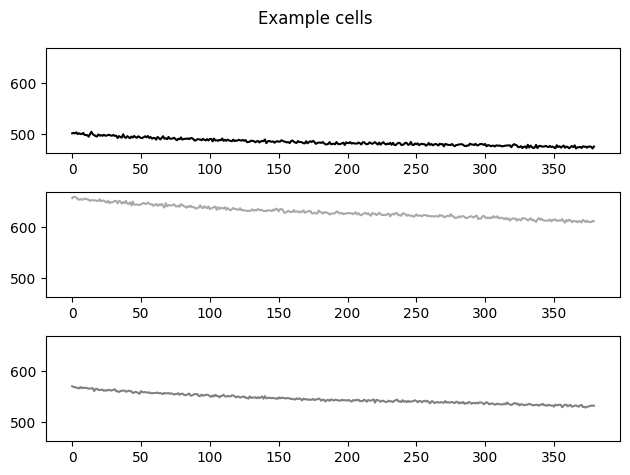

In [6]:
coordinates = np.asarray(coords)
data = np.asarray(traces).T

fig, axs = plt.subplots(3, 1, sharey=True)
axs[0].plot(data[10:390,2], color='black')
axs[1].plot(data[10:390,3], color='darkgrey')
axs[2].plot(data[10:390,4], color='grey')
for ax in axs:
    ax.tick_params(axis='x')#, colors='white')
    ax.tick_params(axis='y')#, colors='white')
fig.suptitle('Example cells')#, color='white')

plt.tight_layout()
file_name = f"Z:/smorou/Analysis/imaging_analysis/CalciumIm/Plots/{file_name_without_ext}{timestamp}.png"
additional_string = '_example_cells'
plt.tight_layout()
#plt.savefig(f"{file_name.replace('.png', '')}{additional_string}.png", transparent=True)

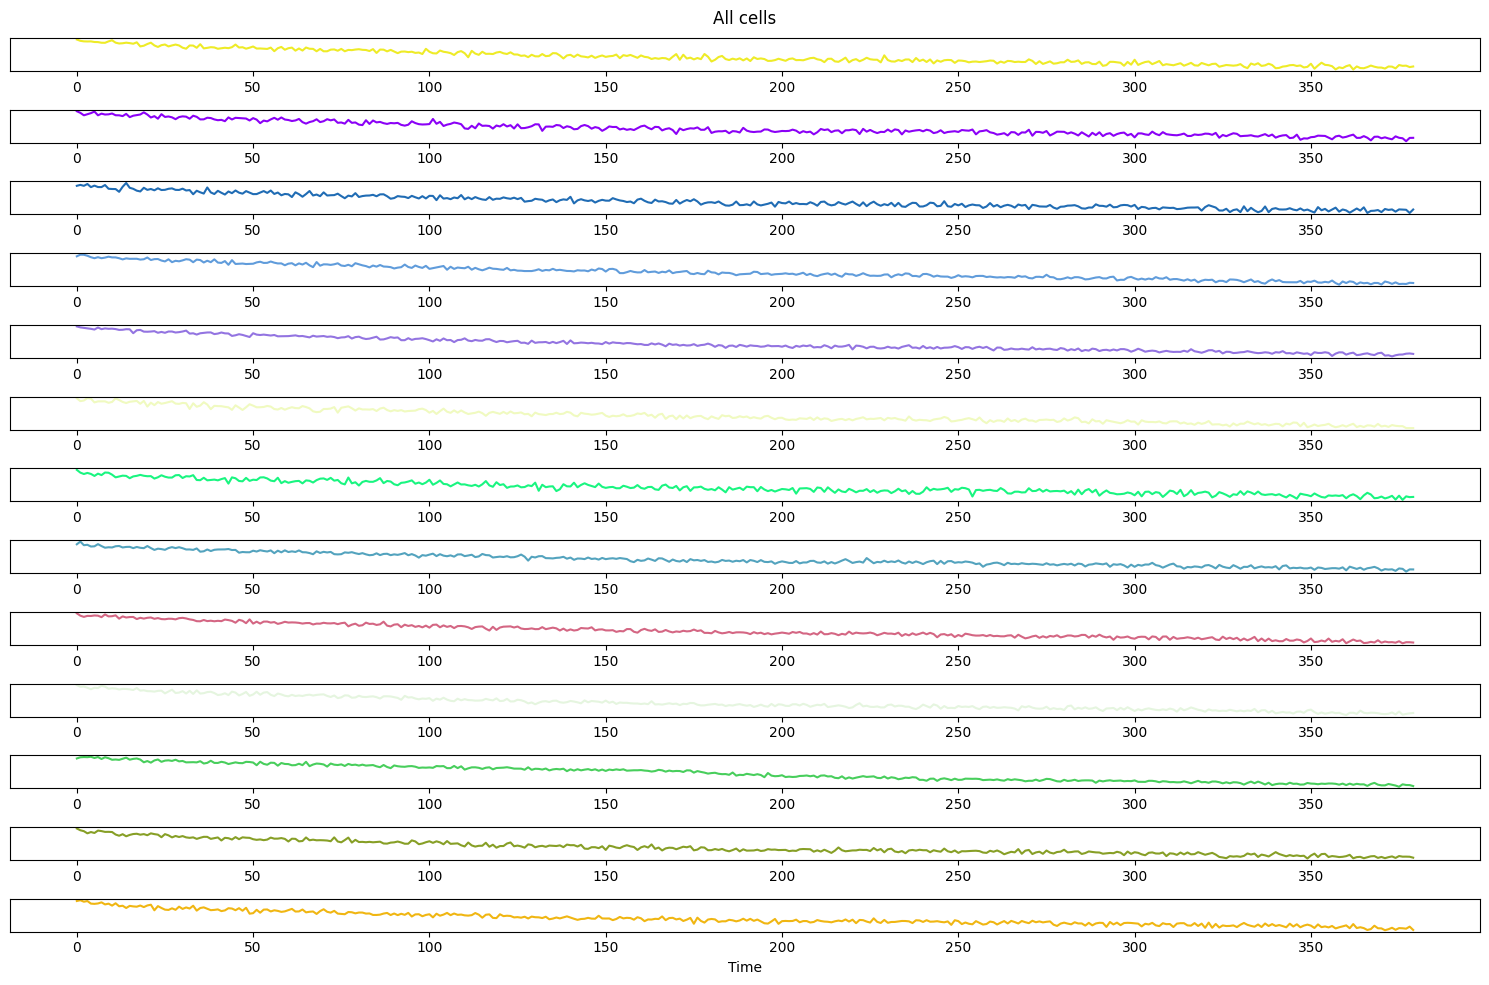

In [9]:
plt.figure(figsize=(15, 10))
data = np.asarray(traces[0]).T

for i in range(0,len(data.T)):
    plt.subplot(len(data.T),1,i+1)
    plt.plot(data[10:390,i], c=(np.random.rand(3)))
    plt.yticks([])

plt.tick_params(axis='x')#, colors='white')
plt.suptitle('All cells')#, color='white')
plt.xlabel('Time')#, color='white')
additional_string1 = '_all_cells'
plt.tight_layout()

#plt.savefig(f"{file_name.replace('.png', '')}{additional_string1}.png", transparent=True)

IndexError: index 9 is out of bounds for axis 0 with size 1

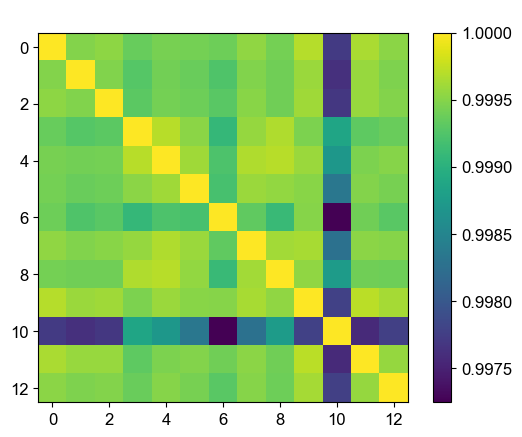

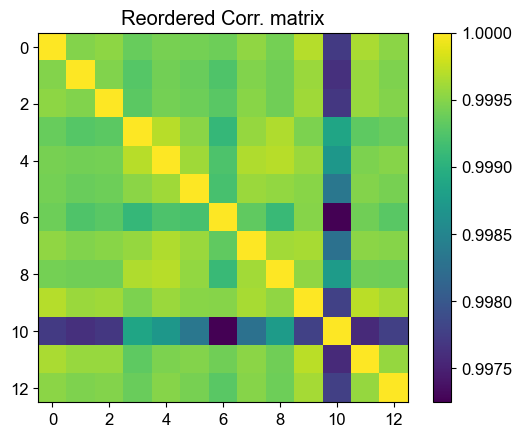

In [14]:
corr_values = np.empty( (len(data.T), len(data.T)) )

for i in range(len(data.T)):
    for j in range(0,len(data.T)):
        temp = np.corrcoef(data[:,i],data[:,j])
        corr_values[i,j] = temp[0,1]

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12

plt.figure()
plt.imshow(corr_values)
plt.title('Correlation matrix',color='white')
plt.colorbar()
plt.tick_params(axis='x')#, colors='white')
plt.tick_params(axis='y')#, colors='white')
additional_string2 = '_corr_matrix'
#plt.savefig(f"{file_name.replace('.png', '')}{additional_string2}.png", transparent=True)

corr_index = np.empty((len(data.T)))
reordered_data = data[:, np.argsort(corr_index)]

for j in range(0, len(data.T)):
    temp = np.corrcoef(data[:,0],reordered_data[:,j])
    corr_index[j] = temp[0,1]

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12

plt.figure()
plt.imshow(corr_values)
plt.title('Reordered Corr. matrix')
plt.colorbar()



In [15]:
plt.figure()

reordered_coords = coordinates[np.argsort(corr_index),:].astype(int)
reordered_data = data[:, np.argsort(corr_index)].T
print('reordered_data', reordered_data.shape)
print('reordered_coords', reordered_coords.shape)

#connection of cell activity, scatter and line 
for i in range(0,len(data.T)):
    plt.scatter(reordered_coords[i,1],reordered_coords[i,0])
plt.title('Cell positions', color='white')
plt.tick_params(axis='x')#, colors='white')
plt.tick_params(axis='y')#, colors='white')
additional_string3 = '_cell_positions'
plt.savefig(f"{file_name.replace('.png', '')}{additional_string3}.png", transparent=True)


IndexError: index 9 is out of bounds for axis 0 with size 1

<Figure size 640x480 with 0 Axes>

NameError: name 'reordered_coords' is not defined

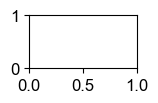

In [16]:
#graph for all vids
plt.figure()
all_correlations = []
for cell in range(len(traces)):
    coordinates = np.asarray(coords[cell]).astype(int)
    data = np.asarray(traces[cell]).T
    corr_values = np.empty((len(data.T), len(data.T)))

    for i in range(0,len(data.T)):
        for j in range(0,len(data.T)):
            temp = np.corrcoef(data[:,i], data[:,j])
            corr_values[i,j] = temp[0,1]

    ax = plt.subplot(6,4,cell+1)

    for i in range(0,len(data.T)):
        for j in range(0,len(data.T)):
            if corr_values[i,j]>0.9:
                plt.plot([reordered_coords[i,0], reordered_coords[j,1]], [reordered_coords[i,1], reordered_coords[j,1]], 'k', linewidth = temp[0,1])
    
    for i in range(0,len(data.T)):
        plt.scatter(coordinates[i,0],coordinates[i,1],s=35)

    all_correlations.append(corr_values)

plt.title(traces_list[cell])
ax.axis('off')